In [32]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('Solarize_Light2')

In [4]:
df = pd.read_csv('train.csv')

In [5]:
df.head(6)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227


In [6]:
df.shape

(550068, 12)

In [7]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [8]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

Product_Category_2' and 'Product_Category_3' has lot of null vlaues in it ,so we will be deleting that column rather than filling wth mean or any values  

# Data Cleaning

In [9]:
del df['Product_Category_2']
del df['Product_Category_3']

In [10]:
df.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [11]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Purchase                      0
dtype: int64

# Data Correletion 

In [12]:
df.corr()

,User_ID,Occupation,Marital_Status,Product_Category_1,Purchase
User_ID,1.000000,-0.023971,0.020443,0.003825,0.004716
Occupation,-0.023971,1.000000,0.024280,-0.007618,0.020833
Marital_Status,0.020443,0.024280,1.000000,0.019888,-0.000463
Product_Category_1,0.003825,-0.007618,0.019888,1.000000,-0.343703
Purchase,0.004716,0.020833,-0.000463,-0.343703,1.000000


<AxesSubplot:>

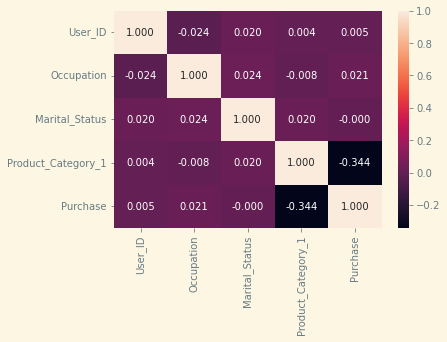

In [13]:
sns.heatmap(df.corr(),annot = True,fmt = '.3f')

 Product Category has high impact on purchase amount 

# Data Frequency Distribution

<AxesSubplot:ylabel='Frequency'>

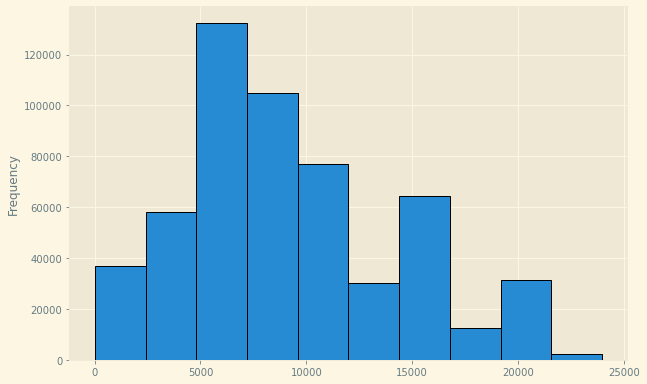

In [14]:
df['Purchase'].plot(kind = 'hist',figsize = (10,6.5),edgecolor = 'black')

##### As we can see most of the data lies in between 5000 and 10000 range .However, there is observation of data after 20000 which can be considered outliers 

# Data Analysis

### 1) Gender Analysis

In [15]:
gender_ratio_data = pd.DataFrame({'Ratio': [len(df[df['Gender'] =='M']),len(df[df['Gender'] =='F'])]},index = ['Male','Female'])
gender_ratio_data

,Ratio
Male,414259
Female,135809


#### A) Data Analysis on Gender Contribution on black friday sale day

array([<AxesSubplot:ylabel='Ratio'>], dtype=object)

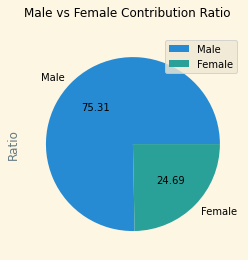

In [16]:
gender_ratio_data.plot.pie(y='Ratio',autopct = '%.2f',subplots=True,title = 'Male vs Female Contribution Ratio')

#### B) Data Analysis on Gender Purchase on black friday sale day

array([<AxesSubplot:ylabel='Purchase'>], dtype=object)

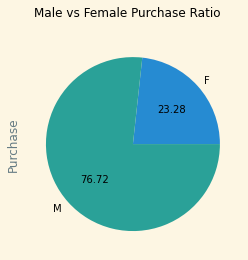

In [17]:
gender_purchase_data = df.groupby('Gender')['Purchase'].sum()
gender_purchase_data.plot.pie(autopct = '%.2f',subplots = True,title = 'Male vs Female Purchase Ratio')

### 2) Marital Anlaysis

array([<AxesSubplot:ylabel='Purchase'>], dtype=object)

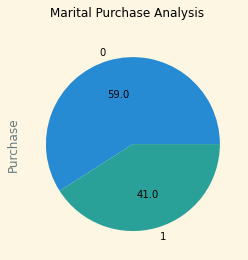

In [18]:
marital_data = df.groupby('Marital_Status')['Purchase'].sum() 
marital_data.plot.pie(subplots = True,title = 'Marital Purchase Analysis',autopct = '%.1f')

Looking at above plot, we can observer that 'Singles' buys more than married people

### 3) Occupation Analysis

<AxesSubplot:title={'center':'Purchase made according to different Occupation'}, xlabel='Occupation'>

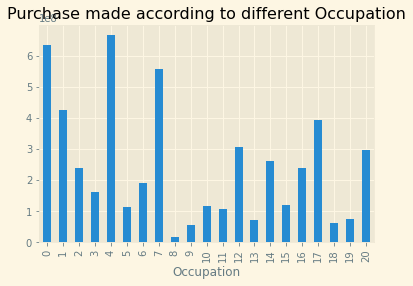

In [19]:
occup_data = df.groupby('Occupation')['Purchase'].sum()
occup_data.plot(kind = 'bar',title = 'Purchase made according to different Occupation')

Age between 18 to 45 buys more than other age groups

### 4) City Analysis

<AxesSubplot:title={'center':'City wise purcahse'}, xlabel='City_Category'>

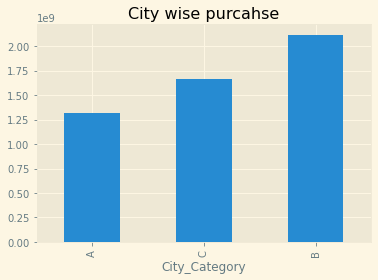

In [20]:
city_data = df.groupby('City_Category')['Purchase'].sum()
city_data = city_data.sort_values()
city_data.plot(kind = 'bar',title = 'City wise purcahse')

 City B has done most purchase

### 5) Age Analysis

<AxesSubplot:title={'center':'Age wise purcahse'}, xlabel='Age'>

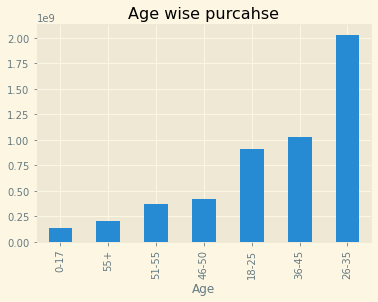

In [21]:
age_data = df.groupby('Age')['Purchase'].sum()
age_data = age_data.sort_values()
age_data.plot(kind = 'bar',title = 'Age wise purcahse')

 People who comes into the range of 26 - 35 age group purchases more

### 6)Customer analysis 

#### 6.1) Age and Gender

<AxesSubplot:xlabel='Gender', ylabel='count'>

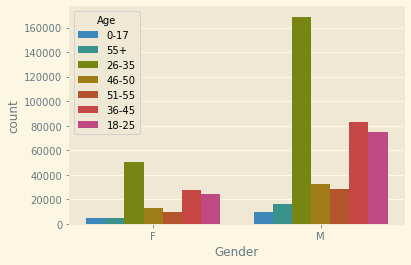

In [24]:
gen_age_data = sns.countplot(x='Gender',hue= 'Age',data = df,)
gen_age_data

#### 6.2) Marital Status and Gender

<AxesSubplot:xlabel='Gender', ylabel='count'>

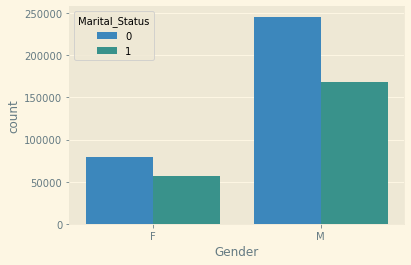

In [25]:
gen_mart_data= sns.countplot(x='Gender',hue= 'Marital_Status',data = df,)
gen_mart_data

Single Males purchases more than married males

#### 6.3) City Category and Age

<AxesSubplot:xlabel='Age', ylabel='count'>

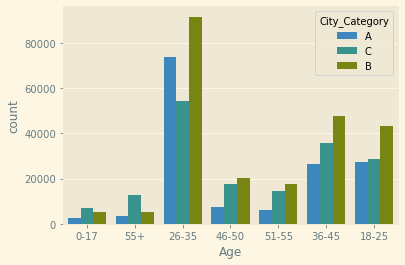

In [30]:
age_city_data= sns.countplot(x='Age',hue= 'City_Category',data = df,)
age_city_data

#### 6.4) City Category and Gender

<AxesSubplot:xlabel='Gender', ylabel='count'>

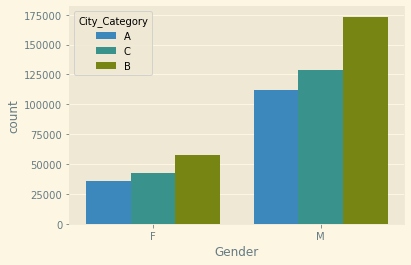

In [26]:
gen_city_data= sns.countplot(x='Gender',hue= 'City_Category',data = df,)
gen_city_data

### 7) Top 5 most product which was purchased in black friday sale

array([<AxesSubplot:ylabel='Purchase'>], dtype=object)

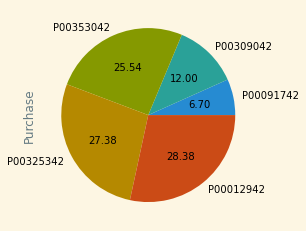

In [22]:
top_pdt = df.groupby('Product_ID')['Purchase'].sum()
top_pdt = top_pdt.sort_values()

top_pdt = top_pdt.head(5)
top_pdt.plot(kind = 'pie',subplots = True,autopct = '%.2f')

### 8) Purchase made by those customers who stayed in the categorical city in terms of years

<AxesSubplot:title={'center':'Customer purchase by their years in the city'}, xlabel='Stay_In_Current_City_Years'>

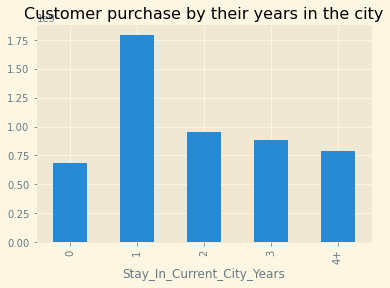

In [23]:
sty_city  =  df.groupby('Stay_In_Current_City_Years')['Purchase'].sum()
sty_city.plot(kind = 'bar',title = 'Customer purchase by their years in the city')

 As we can oberserve, that people who lives more than 1 years in the city purchases less 